In [35]:
!pip install openpyxl
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [28]:
def getio (year):
    path = './bb22a10summarytables.xlsx'
    # Input output table
    df = pd.read_excel(path,
                       sheet_name = str(year),
                       usecols = "C:L",
                       header = None,
                       skiprows = 52,
                       nrows = 10)
    z = np.array(df,dtype = float) # £ million
    # Output per sector 
    dfx = pd.read_excel(path,
                        sheet_name = str(year),
                        usecols = "C:L",
                        header = None,
                        skiprows = 75,
                        nrows = 1)
    x = np.array(dfx, dtype = float)[0] # £ million
    return [z, x]



0

In [34]:
def coef(year):
    IOmatrix, output = getio(year)
    n = len(IOmatrix)
    result = np.empty([n,n])
    for i in range(n):
        for j in range(n):
            result[i][j] = (IOmatrix[i][j]) / output[j]
    return result
    
coef(2019)

coefs = [coef(year) for year in range(1997,2021)]
coefs

[array([[1.87572534e-01, 2.23560962e-02, 1.86131353e-05, 8.61346417e-04,
         0.00000000e+00, 8.08943681e-06, 6.69841716e-05, 0.00000000e+00,
         2.18101402e-04, 4.42249576e-04],
        [3.06818182e-01, 4.75930661e-01, 2.87414729e-01, 1.58053755e-01,
         1.17089313e-01, 3.81821418e-02, 1.51250260e-02, 5.68544142e-02,
         1.29668892e-01, 1.26753642e-01],
        [3.09477756e-03, 6.30197841e-03, 2.47052145e-01, 1.05548065e-02,
         8.56636587e-04, 9.42419389e-03, 6.47134082e-02, 1.06555357e-02,
         1.82140031e-02, 6.21606349e-03],
        [1.78916828e-02, 2.73559240e-02, 3.23868554e-03, 1.37451011e-01,
         3.12731028e-02, 6.33079325e-02, 1.54733436e-03, 5.59583635e-02,
         2.31542535e-02, 2.50853787e-02],
        [7.93036750e-03, 1.18592558e-02, 8.13394012e-03, 1.88402964e-02,
         1.52352230e-01, 5.15944280e-02, 4.95013028e-03, 3.37139060e-02,
         1.79553247e-02, 3.56010909e-02],
        [2.72243714e-02, 2.45234775e-02, 1.68728071e-02, 2.7

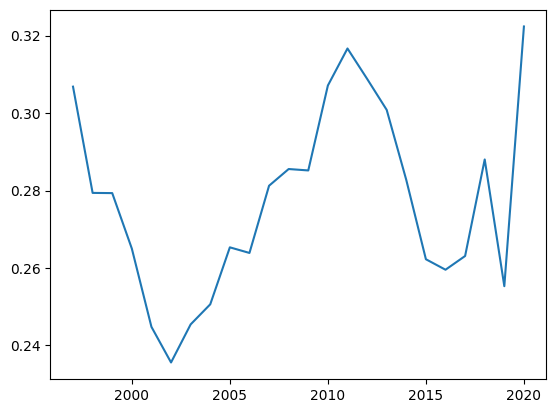

In [38]:
xaxis = range(1997, 2021)
yaxis = [coefs[year][1, 0] for year in range(2021-1997)]
plt.plot(xaxis, yaxis)

In [44]:
def leon(a):
    n = len(a)
    result = np.linalg.inv(np.identity(n) - a)
    return result


# def highest_impact():
########################
########################
########################
########################

np.round(leon(coef(1997)),2)[:3,:3]

array([[1.25, 0.06, 0.02],
       [0.78, 2.01, 0.79],
       [0.02, 0.02, 1.34]])

In [143]:
def minaij(mats,i,j):
    Min = mats[0][i,j]
    for year in mats:
        if year[i,j] < Min:
            Min = year[i,j]
    return Min

def maxaij(mats,i,j):
    Max = mats[0][i,j]
    for year in mats:
        if year[i,j] > Max:
            Max = year[i,j]
    return Max

def simA(mats):
    n = len(mats[0])
    result = np.empty([n,n])
    for i in range(n):
        for j in range(n):
            amax = maxaij(mats,i,j)
            amin = minaij(mats,i,j)
            result[i,j] = random.uniform(amin, amax)
    return result

# [round(minaij(coefs, 1, 0), 2), round(maxaij(coefs, 1, 0), 2)]

np.round(simA(coefs), 2)[:3, :3]
############## test highest_impact
##############

array([[0.15, 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.26, 0.47, 0.28, 0.18, 0.1 , 0.03, 0.02, 0.07, 0.14, 0.15],
       [0.01, 0.01, 0.31, 0.01, 0.  , 0.01, 0.07, 0.01, 0.02, 0.01],
       [0.03, 0.03, 0.  , 0.13, 0.02, 0.06, 0.  , 0.04, 0.03, 0.02],
       [0.02, 0.01, 0.01, 0.02, 0.16, 0.06, 0.01, 0.03, 0.02, 0.04],
       [0.04, 0.03, 0.02, 0.02, 0.02, 0.29, 0.11, 0.02, 0.01, 0.02],
       [0.  , 0.  , 0.  , 0.03, 0.02, 0.01, 0.02, 0.02, 0.01, 0.02],
       [0.04, 0.05, 0.05, 0.08, 0.11, 0.11, 0.04, 0.2 , 0.07, 0.09],
       [0.  , 0.  , 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.06, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.01, 0.01, 0.  , 0.  , 0.01, 0.05]])

In [ ]:
simulations = [(((((simA))))) for i in range(1000)] #use highest_impact on simA

def getProb(simulations)
